## Lesson 3 Part 2 Creating multiple plots
### A closer look at matplotlib

#### From: https://realpython.com/python-matplotlib-guide/#:~:text=A%20Figure%20object%20is%20the,%E2%80%9D%20as%20we%20might%20expect).

#### First let's take a closer look at matplotlib's control of figures and sub-plots

#### video lesson:  
https://www.youtube.com/watch?v=pycy8yNuiZw&list=PL66uKvacDNIfFjQR8mu4M-dv_gQphK5qg&index=5

In matplotlib, a "**figure**" is the outer container that might contain multiple plots for example in a row or grid or it might contain just one plot.  The individual plots are referred to as "**axes**". 



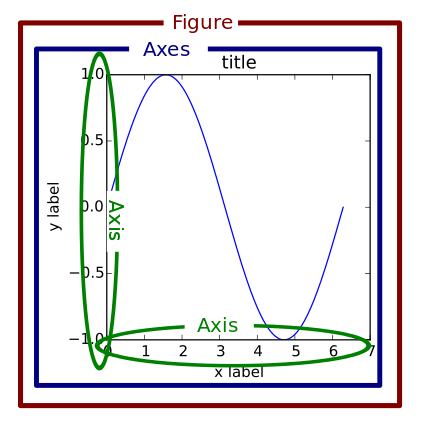



Examples

````Python
fig, ax = plt.subplots(nrows=1, ncols=1) #if we only have one axes (plot) 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) #if we define 2 axes in one figure
````

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate some data to plot

In [2]:
x = np.random.randint(low=1, high=11, size=50) #generate 50 random integers between 1 and 10
y = x + np.random.randint(1, 5, size=x.size)  #generate 50 random integers between 1 and 4 and add to x
data = np.column_stack((x, y))
data[0:5] #with numpy arrays we use different notation to slice elements as compared to pandas

array([[ 7, 11],
       [ 2,  5],
       [ 6, 10],
       [ 4,  5],
       [ 7,  8]])

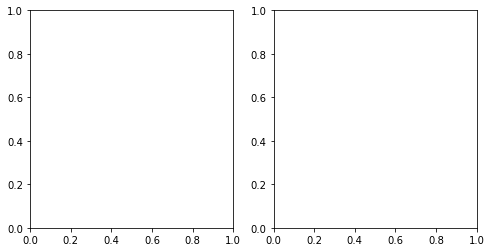

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))

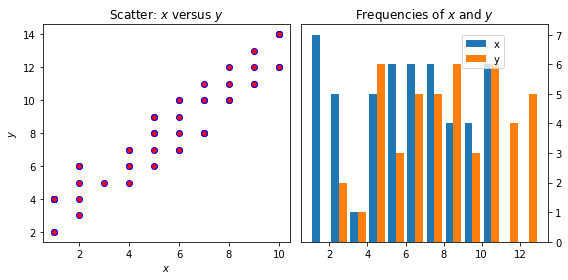

In [4]:
fig, (axes1, axes2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
axes1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
axes1.set_title('Scatter: $x$ versus $y$')
axes1.set_xlabel('$x$')
axes1.set_ylabel('$y$')

axes2.hist(data, bins=np.arange(data.min(), data.max()),label=('x', 'y'))
axes2.legend(loc=(0.65, 0.8))
axes2.set_title('Frequencies of $x$ and $y$')
axes2.yaxis.tick_right()

fig.tight_layout()

Format of above would be: 
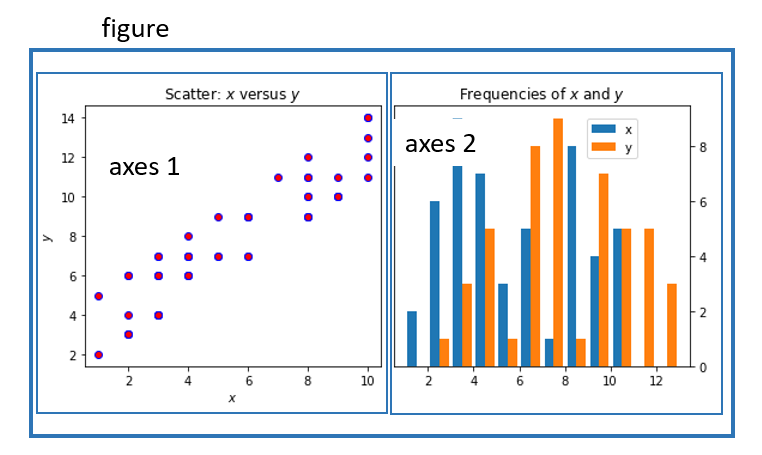

If you need more advanced layout beyond simple grids of graphs, then Matplotlib’s **gridspec** module allows for more subplot customization. Pyplot’s **subplot2grid()** interacts with this module. 

Say we want this setup:
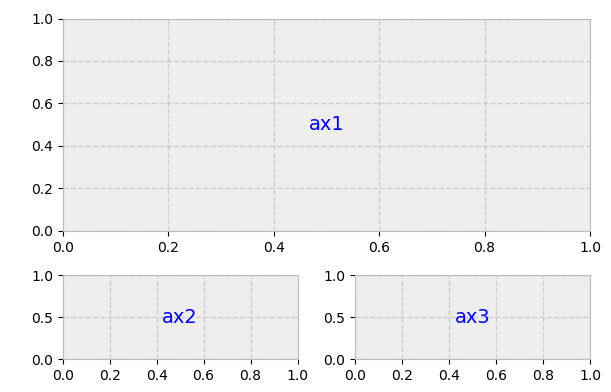

Set it up this way and allow **ax1** to span 2 columns and 2 rows: 
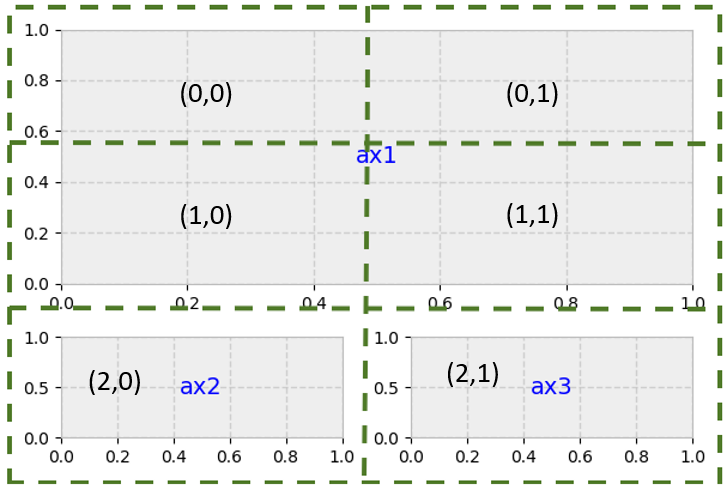

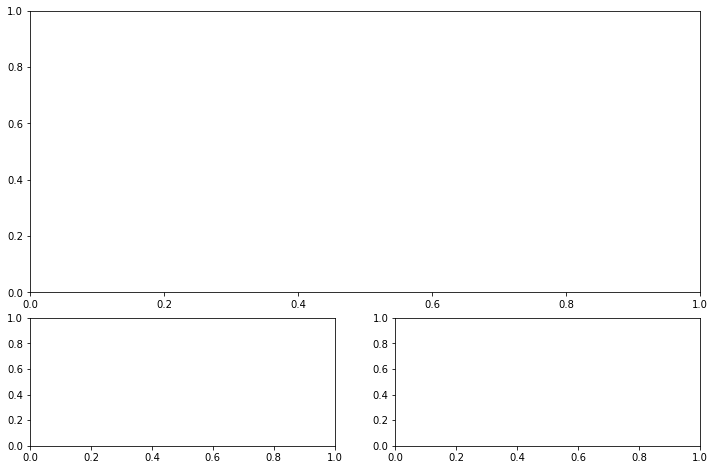

In [5]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8)) #overall size of figure
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # span 2 col and 2 rows
ax2 = plt.subplot2grid(gridsize, (2, 0)) #3rd row, 1st col
ax3 = plt.subplot2grid(gridsize, (2, 1)) #3rd row, 2nd col

Import a set of data that I downloaded from the web.  from: http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz

In [6]:
housing = np.loadtxt('./CaliforniaHousing/cal_housing.data', delimiter=',')

In [7]:
y = housing[:, -1] #home price
pop, age = housing[:, [4, 7]].T #create an (pop,age) pair (area population,age of home)

In [15]:
# a function to add a textbox to our bottom to plots

def add_titlebox(ax, text):
    ax.text(.55, .8, text,
    horizontalalignment='center',
    transform=ax.transAxes,
    bbox=dict(facecolor='white', alpha=0.6),
    fontsize=10)
    return ax

<IPython.core.display.Javascript object>


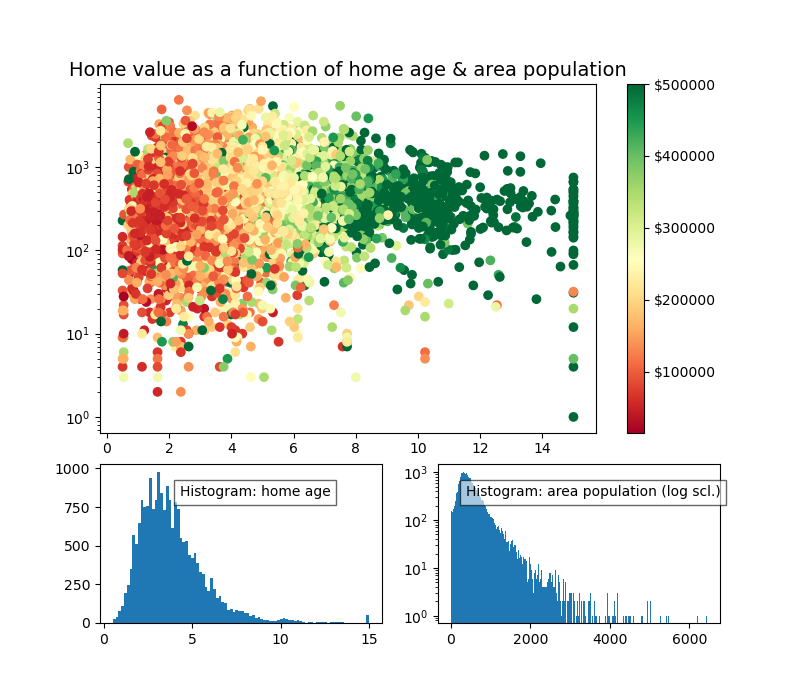

In [21]:
#create layout
gridsize = (3, 2)
fig = plt.figure(figsize=(8, 7)) #overall size of figure
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

#fill layout with plots
ax1.set_title('Home value as a function of home age & area population',fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

plt.show()